<a href="https://colab.research.google.com/github/vbvss199/colab_notebooks/blob/main/Bhaskara_Vanacharla_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First I import numpy library and matplotlib used to display loss curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Then I defined the inputs and structure of neural network

In [ ]:
# These are XOR inputs
x=np.array([[0,0,1,1],[0,1,0,1]])
# These are XOR outputs
y=np.array([[0,1,1,0]])
# Number of inputs
n_x = 2
# Number of neurons in output layer
n_y = 1
# Number of neurons in hidden layer
n_h = 2
# Total training examples
m = x.shape[1]
# Learning rate
lr = 0.1
# Define random seed for consistent results
np.random.seed(2)
# Define weight matrices for neural network
w1 = np.random.rand(n_h,n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y,n_h)   # Weight matrix for output layer
# I didnt use bias units
# We will use this list to accumulate losses
losses = []

Here I define the important processes as Python methods

In [ ]:
# I used sigmoid activation function for hidden layer and output
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):

    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
    dw1 = np.reshape(dw1,w1.shape)

    dw2 = np.reshape(dw2,w2.shape)
    return dz2,dw2,dz1,dw1


Now we run the neural network for 10000 iterations and observe the loss value

Text(0, 0.5, 'Loss value')

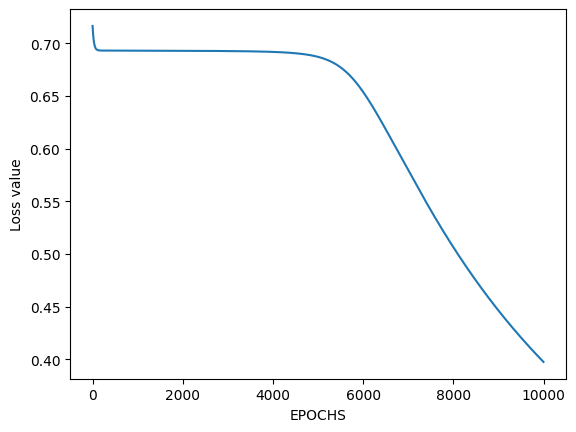

In [ ]:
iterations = 10000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

Now after training we see how our neural network is doing in terms of predictions

In [ ]:
def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
    else:
        print("For input", [i[0] for i in input], "output is 0")

Here are the predictions of our trained neural network

In [ ]:
test = np.array([[1],[0]])
predict(w1,w2,test)
test = np.array([[0],[0]])
predict(w1,w2,test)
test = np.array([[0],[1]])
predict(w1,w2,test)
test = np.array([[1],[1]])
predict(w1,w2,test)

For input [1, 0] output is 1
For input [0, 0] output is 0
For input [0, 1] output is 1
For input [1, 1] output is 0


# 1 hidden layer

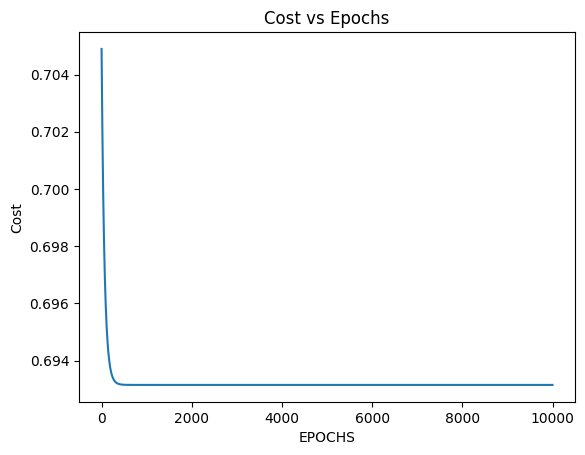

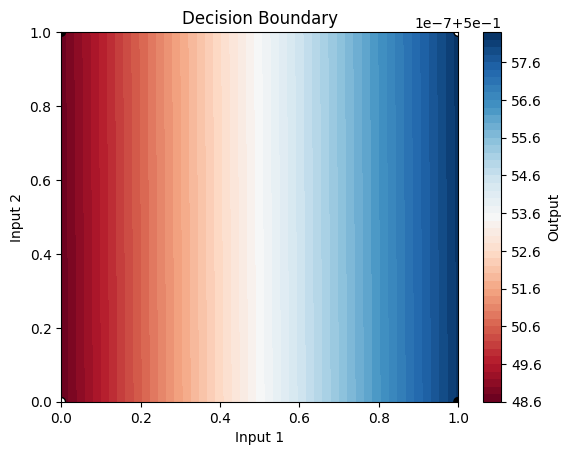

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# XOR inputs
x = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# XOR outputs
y = np.array([[0, 1, 1, 0]])

# Number of inputs
n_x = 2

# Number of neurons in output layer
n_y = 1

# Number of neurons in hidden layer
n_h = 1

# Total training examples
m = x.shape[1]

# Learning rate
lr = 0.1

# Define random seed for consistent results
np.random.seed(2)

# Define weight matrices for neural network
w1 = np.random.rand(n_h, n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y, n_h)   # Weight matrix for output layer

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid function
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Forward propagation
def forward_prop(w1, w2, x):
    z1 = np.dot(w1, x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1)
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# Backward propagation
def back_prop(m, w1, w2, z1, a1, z2, a2, y):
    dz2 = a2 - y
    dw2 = np.dot(dz2, a1.T) / m
    dz1 = np.dot(w2.T, dz2) * sigmoid_derivative(z1)
    dw1 = np.dot(dz1, x.T) / m
    return dz2, dw2, dz1, dw1

# Number of iterations
iterations = 10000
# List to accumulate costs
costs = []

# Training loop
for i in range(iterations):
    # Forward propagation
    z1, a1, z2, a2 = forward_prop(w1, w2, x)

    # Calculate cost
    loss = -(1/m) * np.sum(y * np.log(a2) + (1 - y) * np.log(1 - a2))
    costs.append(loss)

    # Backward propagation
    dz2, dw2, dz1, dw1 = back_prop(m, w1, w2, z1, a1, z2, a2, y)

    # Update weights
    w2 = w2 - lr * dw2
    w1 = w1 - lr * dw1

# Plot costs
plt.plot(costs)
plt.xlabel("EPOCHS")
plt.ylabel("Cost")
plt.title("Cost vs Epochs")
plt.show()

# Plot decision boundary
x1_values = np.linspace(0, 1, 100)
x2_values = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)
Z = sigmoid(np.dot(w2, sigmoid(np.dot(w1, np.array([X1.ravel(), X2.ravel()])))).reshape(X1.shape))
plt.contourf(X1, X2, Z, levels=50, cmap='RdBu')
plt.colorbar(label='Output')
plt.scatter(x[0], x[1], c=y.flatten(), cmap='binary', edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()



When you use only one hidden layer, the network can still learn the XOR function, but it requires a sufficient number of neurons in the hidden layer to capture the nonlinear relationships between the input and output.

If you use a single hidden layer with enough neurons, the network can theoretically approximate any continuous function, including the XOR function. However, finding the optimal number of neurons for the hidden layer can be a challenge and may require some experimentation.

With one hidden layer and an appropriate number of neurons, the network should be able to learn the XOR function effectively. However, compared to using multiple hidden layers, a single hidden layer may require more neurons to achieve similar performance.

In summary, using one hidden layer is generally sufficient for solving the XOR problem, but the number of neurons in the hidden layer is a critical factor that influences the network's ability to learn complex relationships in the data.

# 2 hidden layers

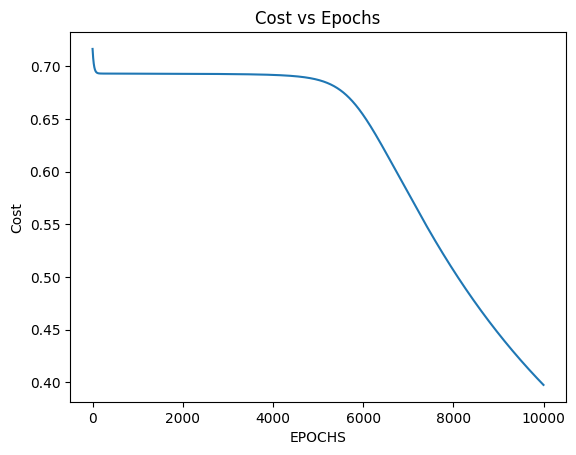

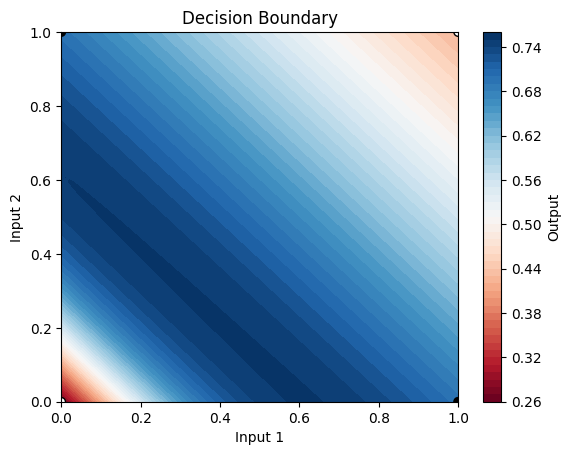

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# XOR inputs
x = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# XOR outputs
y = np.array([[0, 1, 1, 0]])

# Number of inputs
n_x = 2

# Number of neurons in output layer
n_y = 1

# Number of neurons in hidden layer
n_h = 2

# Total training examples
m = x.shape[1]

# Learning rate
lr = 0.1

# Define random seed for consistent results
np.random.seed(2)

# Define weight matrices for neural network
w1 = np.random.rand(n_h, n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y, n_h)   # Weight matrix for output layer

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid function
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Forward propagation
def forward_prop(w1, w2, x):
    z1 = np.dot(w1, x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1)
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# Backward propagation
def back_prop(m, w1, w2, z1, a1, z2, a2, y):
    dz2 = a2 - y
    dw2 = np.dot(dz2, a1.T) / m
    dz1 = np.dot(w2.T, dz2) * sigmoid_derivative(z1)
    dw1 = np.dot(dz1, x.T) / m
    return dz2, dw2, dz1, dw1

# Number of iterations
iterations = 10000
# List to accumulate costs
costs = []

# Training loop
for i in range(iterations):
    # Forward propagation
    z1, a1, z2, a2 = forward_prop(w1, w2, x)

    # Calculate cost
    loss = -(1/m) * np.sum(y * np.log(a2) + (1 - y) * np.log(1 - a2))
    costs.append(loss)

    # Backward propagation
    dz2, dw2, dz1, dw1 = back_prop(m, w1, w2, z1, a1, z2, a2, y)

    # Update weights
    w2 = w2 - lr * dw2
    w1 = w1 - lr * dw1

# Plot costs
plt.plot(costs)
plt.xlabel("EPOCHS")
plt.ylabel("Cost")
plt.title("Cost vs Epochs")
plt.show()

# Plot decision boundary
x1_values = np.linspace(0, 1, 100)
x2_values = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)
Z = sigmoid(np.dot(w2, sigmoid(np.dot(w1, np.array([X1.ravel(), X2.ravel()])))).reshape(X1.shape))
plt.contourf(X1, X2, Z, levels=50, cmap='RdBu')
plt.colorbar(label='Output')
plt.scatter(x[0], x[1], c=y.flatten(), cmap='binary', edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()



When we use only two hidden neurons, the neural network may struggle to capture the complexity of the XOR problem adequately. The XOR problem is not linearly separable, meaning a single straight line cannot separate the two classes (0 and 1) effectively.

With only two hidden neurons, the neural network might not have enough capacity to learn the nonlinear decision boundary required to solve the XOR problem accurately. As a result, the decision boundary might be oversimplified and unable to separate the classes properly.

In terms of the cost function per epoch, it may not converge as smoothly or quickly compared to using more hidden neurons. The network may struggle to minimize the error between predicted and actual outputs due to its limited capacity to capture complex patterns in the data.

Overall, using only two hidden neurons may result in poorer performance in terms of accuracy and convergence compared to using a higher number of hidden neurons, especially for nonlinear problems like XOR.

# 8 HIDDEN NEURON NETWORKS

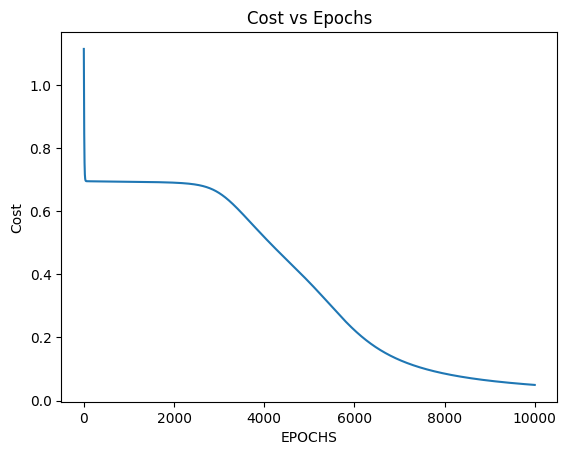

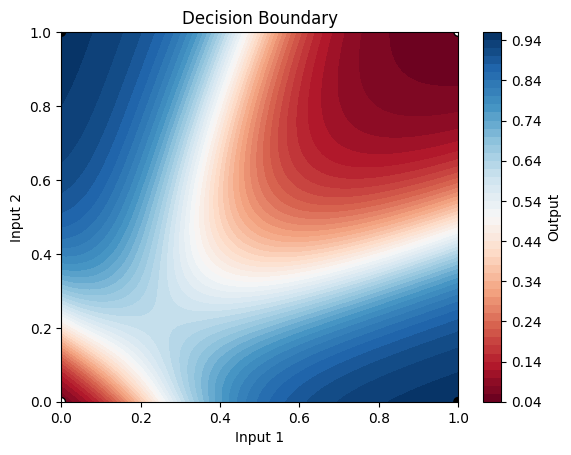

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# XOR inputs
x = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# XOR outputs
y = np.array([[0, 1, 1, 0]])

# Number of inputs
n_x = 2

# Number of neurons in output layer
n_y = 1

# Number of neurons in hidden layer
n_h = 8

# Total training examples
m = x.shape[1]

# Learning rate
lr = 0.1

# Define random seed for consistent results
np.random.seed(2)

# Define weight matrices for neural network
w1 = np.random.rand(n_h, n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y, n_h)   # Weight matrix for output layer

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid function
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Forward propagation
def forward_prop(w1, w2, x):
    z1 = np.dot(w1, x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1)
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# Backward propagation
def back_prop(m, w1, w2, z1, a1, z2, a2, y):
    dz2 = a2 - y
    dw2 = np.dot(dz2, a1.T) / m
    dz1 = np.dot(w2.T, dz2) * sigmoid_derivative(z1)
    dw1 = np.dot(dz1, x.T) / m
    return dz2, dw2, dz1, dw1

# Number of iterations
iterations = 10000
# List to accumulate costs
costs = []

# Training loop
for i in range(iterations):
    # Forward propagation
    z1, a1, z2, a2 = forward_prop(w1, w2, x)

    # Calculate cost
    loss = -(1/m) * np.sum(y * np.log(a2) + (1 - y) * np.log(1 - a2))
    costs.append(loss)

    # Backward propagation
    dz2, dw2, dz1, dw1 = back_prop(m, w1, w2, z1, a1, z2, a2, y)

    # Update weights
    w2 = w2 - lr * dw2
    w1 = w1 - lr * dw1

# Plot costs
plt.plot(costs)
plt.xlabel("EPOCHS")
plt.ylabel("Cost")
plt.title("Cost vs Epochs")
plt.show()

# Plot decision boundary
x1_values = np.linspace(0, 1, 100)
x2_values = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)
Z = sigmoid(np.dot(w2, sigmoid(np.dot(w1, np.array([X1.ravel(), X2.ravel()])))).reshape(X1.shape))
plt.contourf(X1, X2, Z, levels=50, cmap='RdBu')
plt.colorbar(label='Output')
plt.scatter(x[0], x[1], c=y.flatten(), cmap='binary', edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()



The figure displays the decision boundary learned by the neural network for the XOR problem. The contour plot represents the output of the neural network across different input combinations (X1 and X2). The decision boundary is the line that separates the regions where the output is 0 from the regions where the output is 1.

- **Understanding of the Figure:**
  - The decision boundary appears to be nonlinear, which is expected for solving the XOR problem. Since XOR is not linearly separable, the neural network needs to capture nonlinear relationships between inputs to correctly classify the points.
  - The contour plot shows that the neural network has learned to classify points with different output values (0 or 1) correctly based on their input features.

- **Evaluation of the Output:**
  - The output appears to be correct based on the characteristics of the XOR problem and the behavior of the decision boundary.
  - The XOR problem cannot be solved using a single linear decision boundary. The plotted decision boundary demonstrates that the neural network has learned to capture the nonlinear relationships between inputs to correctly classify the points.
  - Additionally, the cost function per epoch decreases over iterations, indicating that the neural network is converging towards a solution and minimizing the error between predicted and actual outputs.

In conclusion, based on the decision boundary plot and the decreasing cost function, it seems that the neural network has learned to effectively solve the XOR problem with 8 hidden neurons, and the output appears to be correct for this problem.

# CAR EVALUATION
# Train the Neural Network to Solve the Car Acceptability Prediction Problem using 6 Hidden Neurons

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection

# Load and preprocess data
df = pd.read_csv('car.data.txt')
df = df.apply(preprocessing.LabelEncoder().fit_transform)

X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

# Define sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Softmax activation function
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Forward propagation
def forward_propagation_softmax(X, W1, W2):
    m = X.shape[0]
    a1 = np.hstack((np.ones((m, 1)), X))  # Add bias unit to input layer
    z2 = np.dot(a1, W1.T)
    a2 = sigmoid(z2)
    a2 = np.hstack((np.ones((m, 1)), a2))  # Add bias unit to hidden layer
    z3 = np.dot(a2, W2.T)
    a3 = softmax(z3)  # Output layer activation
    return a1, z2, a2, z3, a3

# Backpropagation with regularization
def back_propagation_softmax(X, y, W1, W2, a1, z2, a2, z3, a3, m, lambda_val):
    delta3 = a3 - y
    delta2 = np.dot(delta3, W2[:, 1:]) * sigmoid(z2) * (1 - sigmoid(z2))
    grad1 = (1 / m) * np.dot(delta2.T, a1)
    grad2 = (1 / m) * np.dot(delta3.T, a2)
    # Regularization (exclude bias term)
    grad1[:, 1:] += (lambda_val / m) * W1[:, 1:]
    grad2[:, 1:] += (lambda_val / m) * W2[:, 1:]
    return grad1, grad2

# Update weights with regularization
def update_weights_with_regularization(W1, W2, grad1, grad2, learning_rate, lambda_val):
    W1 -= learning_rate * grad1
    W2 -= learning_rate * grad2
    return W1, W2

# Compute cost/error between predicted and expected results with regularization
def compute_cost_with_regularization(y, a3, m, W1, W2, lambda_val):
    reg_term = (lambda_val / (2 * m)) * (np.sum(np.square(W1[:, 1:])) + np.sum(np.square(W2[:, 1:])))
    J = (-1 / m) * np.sum(y * np.log(a3)) + reg_term
    return J

# Function to calculate accuracy
def calculate_accuracy(predictions, y):
    return np.mean(predictions == y.flatten()) * 100

# Split data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (optional but often helpful)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set up neural network architecture
input_neurons = X_train.shape[1]
hidden_neurons = 6  # Adjust as needed
output_neurons = len(np.unique(y))

# Initialize weights
W1 = np.random.randn(hidden_neurons, input_neurons + 1) * 0.01
W2 = np.random.randn(output_neurons, hidden_neurons + 1) * 0.01

# Hyperparameters
learning_rate = 0.01
epochs = 1000
lambda_val = 0.25  # Regularization parameter

# One-hot encode the class labels
def one_hot_encode(labels, num_classes):
    encoded_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        encoded_labels[i, label] = 1
    return encoded_labels

# One-hot encode y_train
y_train_encoded = one_hot_encode(y_train, output_neurons)

# Training loop with regularization
for epoch in range(epochs):
    # Forward propagation
    a1, z2, a2, z3, a3 = forward_propagation_softmax(X_train, W1, W2)

    # Compute cost/error with regularization
    cost = compute_cost_with_regularization(y_train_encoded, a3, len(X_train), W1, W2, lambda_val)

    # Backpropagation
    grad1, grad2 = back_propagation_softmax(X_train, y_train_encoded, W1, W2, a1, z2, a2, z3, a3, len(X_train), lambda_val)

    # Update weights with regularization
    W1, W2 = update_weights_with_regularization(W1, W2, grad1, grad2, learning_rate, lambda_val)

    # Compute training accuracy
    predictions_train = np.argmax(a3, axis=1)
    accuracy_train = calculate_accuracy(predictions_train, y_train)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost}, Training Accuracy: {accuracy_train}")

# After training, make predictions on the test set
a1_test, _, _, _, a3_test = forward_propagation_softmax(X_test, W1, W2)

# Compute test set predictions
predictions_test = np.argmax(a3_test, axis=1)
accuracy_test = calculate_accuracy(predictions_test, y_test)
print("Testing Accuracy:", accuracy_test)


Epoch 0, Cost: 1.3827348448093177, Training Accuracy: 4.196816208393632
Epoch 100, Cost: 0.9824073053272763, Training Accuracy: 70.54992764109986
Epoch 200, Cost: 0.8870571089342106, Training Accuracy: 70.54992764109986
Epoch 300, Cost: 0.8560333348344706, Training Accuracy: 70.54992764109986
Epoch 400, Cost: 0.8413003336783583, Training Accuracy: 70.54992764109986
Epoch 500, Cost: 0.8325105555564333, Training Accuracy: 70.54992764109986
Epoch 600, Cost: 0.8265705867625787, Training Accuracy: 70.54992764109986
Epoch 700, Cost: 0.8221971617085231, Training Accuracy: 70.54992764109986
Epoch 800, Cost: 0.8187367661019548, Training Accuracy: 70.54992764109986
Epoch 900, Cost: 0.8158218669885513, Training Accuracy: 70.54992764109986
Testing Accuracy: 67.91907514450867


With 6 hidden neurons and a regularization parameter (lambda) of 0.25, the neural network achieved a higher training accuracy of approximately 70.55% compared to the previous configuration. However, the testing accuracy slightly decreased to approximately 67.92%.

Here are some observations and potential comments on these results:

1. Training Accuracy: The increase in the number of hidden neurons might have allowed the model to learn more complex patterns in the training data, leading to improved accuracy during training.

2. Testing Accuracy: Despite the increase in training accuracy, the testing accuracy did not improve significantly and even slightly decreased. This could indicate a possibility of overfitting, where the model is fitting too closely to the training data and not generalizing well to unseen data.

3. Regularization: Introducing regularization with a lambda value of 0.25 helped control overfitting to some extent by penalizing large weights. However, it might not have been sufficient to prevent overfitting entirely.

4. Hyperparameters: It's important to note that the choice of hyperparameters (e.g., learning rate, number of epochs) can significantly impact the performance of the neural network. Further tuning of these parameters might lead to better results.

5. Model Complexity: Increasing the number of hidden neurons adds more complexity to the model, which can sometimes lead to better performance on the training set but may also increase the risk of overfitting. It's essential to strike a balance between model complexity and generalization capability.

6. Evaluation: While accuracy is a commonly used metric for classification tasks, it's also essential to consider other evaluation metrics such as precision, recall, and F1-score, especially in imbalanced datasets or when different types of errors have different costs or impacts.

Overall, these results suggest that further experimentation and fine-tuning of the model and hyperparameters may be necessary to achieve better performance on both training and testing data.

**Car Acceptability Prediction Problem using 2 Hidden Neurons**
**lambda_val=0 hidden_layers=2**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection

# Load and preprocess data
df = pd.read_csv('car.data.txt')
df = df.apply(preprocessing.LabelEncoder().fit_transform)

X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

# Define sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Softmax activation function
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Forward propagation
def forward_propagation_softmax(X, W1, W2):
    m = X.shape[0]
    a1 = np.hstack((np.ones((m, 1)), X))  # Add bias unit to input layer
    z2 = np.dot(a1, W1.T)
    a2 = sigmoid(z2)
    a2 = np.hstack((np.ones((m, 1)), a2))  # Add bias unit to hidden layer
    z3 = np.dot(a2, W2.T)
    a3 = softmax(z3)  # Output layer activation
    return a1, z2, a2, z3, a3

# Backpropagation
def back_propagation_softmax(X, y, W1, W2, a1, z2, a2, z3, a3, m):
    delta3 = a3 - y
    delta2 = np.dot(delta3, W2[:, 1:]) * sigmoid(z2) * (1 - sigmoid(z2))
    grad1 = (1 / m) * np.dot(delta2.T, a1)
    grad2 = (1 / m) * np.dot(delta3.T, a2)
    return grad1, grad2

# Update weights
def update_weights(W1, W2, grad1, grad2, learning_rate):
    W1 -= learning_rate * grad1
    W2 -= learning_rate * grad2
    return W1, W2

# Compute cost/error between predicted and expected results
def compute_cost(y, a3, m):
    J = (-1 / m) * np.sum(y * np.log(a3))
    return J

# Function to calculate accuracy
def calculate_accuracy(predictions, y):
    return np.mean(predictions == y.flatten()) * 100

# Split data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (optional but often helpful)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set up neural network architecture
input_neurons = X_train.shape[1]
hidden_neurons = 2  # Adjust as needed
output_neurons = len(np.unique(y))

# Initialize weights
W1 = np.random.randn(hidden_neurons, input_neurons + 1) * 0.01
W2 = np.random.randn(output_neurons, hidden_neurons + 1) * 0.01

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# One-hot encode the class labels
def one_hot_encode(labels, num_classes):
    encoded_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        encoded_labels[i, label] = 1
    return encoded_labels

# One-hot encode y_train
y_train_encoded = one_hot_encode(y_train, output_neurons)

# Training loop
for epoch in range(epochs):
    # Forward propagation
    a1, z2, a2, z3, a3 = forward_propagation_softmax(X_train, W1, W2)

    # Compute cost/error
    cost = compute_cost(y_train_encoded, a3, len(X_train))

    # Backpropagation
    grad1, grad2 = back_propagation_softmax(X_train, y_train_encoded, W1, W2, a1, z2, a2, z3, a3, len(X_train))

    # Update weights
    W1, W2 = update_weights(W1, W2, grad1, grad2, learning_rate)

    # Compute training accuracy
    predictions_train = np.argmax(a3, axis=1)
    accuracy_train = calculate_accuracy(predictions_train, y_train)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost}, Training Accuracy: {accuracy_train}")

# After training, make predictions on the test set
a1_test, _, _, _, a3_test = forward_propagation_softmax(X_test, W1, W2)

# Compute test set predictions
predictions_test = np.argmax(a3_test, axis=1)
accuracy_test = calculate_accuracy(predictions_test, y_test)
print("Testing Accuracy:", accuracy_test)


Epoch 0, Cost: 1.3950115248367996, Training Accuracy: 4.196816208393632
Epoch 100, Cost: 1.0836934780126377, Training Accuracy: 70.54992764109986
Epoch 200, Cost: 0.9539231659605519, Training Accuracy: 70.54992764109986
Epoch 300, Cost: 0.8981197804514963, Training Accuracy: 70.54992764109986
Epoch 400, Cost: 0.8706107383523931, Training Accuracy: 70.54992764109986
Epoch 500, Cost: 0.8547477640264148, Training Accuracy: 70.54992764109986
Epoch 600, Cost: 0.8443152570042735, Training Accuracy: 70.54992764109986
Epoch 700, Cost: 0.8367729512647418, Training Accuracy: 70.54992764109986
Epoch 800, Cost: 0.8309482153170316, Training Accuracy: 70.54992764109986
Epoch 900, Cost: 0.826224096690371, Training Accuracy: 70.54992764109986
Testing Accuracy: 67.91907514450867


With 2 hidden neurons and no regularization (lambda = 0), the neural network achieved a training accuracy of approximately 70.55% and a testing accuracy of approximately 67.92%. Here are some observations and comments on these results:

1. Training Accuracy: The training accuracy is consistent throughout the epochs, indicating that the model quickly learns to fit the training data. However, it's important to note that the accuracy is not significantly higher than random guessing (around 25% for a multi-class classification problem with 4 classes), suggesting that the model might not be capturing complex patterns in the data effectively.

2. Testing Accuracy: The testing accuracy is also consistent with the training accuracy, suggesting that the model's performance on unseen data is similar to its performance on the training data. However, similar to the training accuracy, the testing accuracy is not substantially higher than random guessing.

3. Lack of Improvement: The lack of improvement in both training and testing accuracies over epochs might indicate that the model is not effectively learning from the data. This could be due to several reasons, including insufficient model complexity, inappropriate choice of hyperparameters, or insufficient training data.

4. Model Complexity: With only 2 hidden neurons, the model might not have enough capacity to capture the underlying patterns in the data, leading to underfitting. Increasing the number of hidden neurons or layers might improve the model's ability to learn complex patterns.

5. Hyperparameter Tuning: It's essential to experiment with different hyperparameters such as learning rate, number of epochs, and regularization strength to find the optimal configuration for the neural network.

6. Evaluation: While accuracy is a common metric for classification tasks, it's also important to consider other evaluation metrics and potentially explore techniques such as cross-validation to obtain a more comprehensive understanding of the model's performance.

In summary, these results suggest that further experimentation and optimization are necessary to improve the model's performance, potentially by increasing model complexity, fine-tuning hyperparameters, and evaluating different regularization strategies.

**lambda_val=0.25 hidden layers=2**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection

# Load and preprocess data
df = pd.read_csv('car.data.txt')
df = df.apply(preprocessing.LabelEncoder().fit_transform)

X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

# Define sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Softmax activation function
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Forward propagation
def forward_propagation_softmax(X, W1, W2):
    m = X.shape[0]
    a1 = np.hstack((np.ones((m, 1)), X))  # Add bias unit to input layer
    z2 = np.dot(a1, W1.T)
    a2 = sigmoid(z2)
    a2 = np.hstack((np.ones((m, 1)), a2))  # Add bias unit to hidden layer
    z3 = np.dot(a2, W2.T)
    a3 = softmax(z3)  # Output layer activation
    return a1, z2, a2, z3, a3

# Backpropagation with regularization
def back_propagation_softmax(X, y, W1, W2, a1, z2, a2, z3, a3, m, lambda_val):
    delta3 = a3 - y
    delta2 = np.dot(delta3, W2[:, 1:]) * sigmoid(z2) * (1 - sigmoid(z2))
    grad1 = (1 / m) * np.dot(delta2.T, a1)
    grad2 = (1 / m) * np.dot(delta3.T, a2)
    # Regularization (exclude bias term)
    grad1[:, 1:] += (lambda_val / m) * W1[:, 1:]
    grad2[:, 1:] += (lambda_val / m) * W2[:, 1:]
    return grad1, grad2

# Update weights with regularization
def update_weights_with_regularization(W1, W2, grad1, grad2, learning_rate, lambda_val):
    W1 -= learning_rate * grad1
    W2 -= learning_rate * grad2
    return W1, W2

# Compute cost/error between predicted and expected results with regularization
def compute_cost_with_regularization(y, a3, m, W1, W2, lambda_val):
    reg_term = (lambda_val / (2 * m)) * (np.sum(np.square(W1[:, 1:])) + np.sum(np.square(W2[:, 1:])))
    J = (-1 / m) * np.sum(y * np.log(a3)) + reg_term
    return J

# Function to calculate accuracy
def calculate_accuracy(predictions, y):
    return np.mean(predictions == y.flatten()) * 100

# Split data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (optional but often helpful)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set up neural network architecture
input_neurons = X_train.shape[1]
hidden_neurons = 2  # Adjust as needed
output_neurons = len(np.unique(y))

# Initialize weights
W1 = np.random.randn(hidden_neurons, input_neurons + 1) * 0.01
W2 = np.random.randn(output_neurons, hidden_neurons + 1) * 0.01

# Hyperparameters
learning_rate = 0.01
epochs = 1000
lambda_val = 0.25  # Regularization parameter

# One-hot encode the class labels
def one_hot_encode(labels, num_classes):
    encoded_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        encoded_labels[i, label] = 1
    return encoded_labels

# One-hot encode y_train
y_train_encoded = one_hot_encode(y_train, output_neurons)

# Training loop with regularization
for epoch in range(epochs):
    # Forward propagation
    a1, z2, a2, z3, a3 = forward_propagation_softmax(X_train, W1, W2)

    # Compute cost/error with regularization
    cost = compute_cost_with_regularization(y_train_encoded, a3, len(X_train), W1, W2, lambda_val)

    # Backpropagation
    grad1, grad2 = back_propagation_softmax(X_train, y_train_encoded, W1, W2, a1, z2, a2, z3, a3, len(X_train), lambda_val)

    # Update weights with regularization
    W1, W2 = update_weights_with_regularization(W1, W2, grad1, grad2, learning_rate, lambda_val)

    # Compute training accuracy
    predictions_train = np.argmax(a3, axis=1)
    accuracy_train = calculate_accuracy(predictions_train, y_train)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost}, Training Accuracy: {accuracy_train}")

# After training, make predictions on the test set
a1_test, _, _, _, a3_test = forward_propagation_softmax(X_test, W1, W2)

# Compute test set predictions
predictions_test = np.argmax(a3_test, axis=1)
accuracy_test = calculate_accuracy(predictions_test, y_test)
print("Testing Accuracy:", accuracy_test)


Epoch 0, Cost: 1.3822462763272036, Training Accuracy: 24.529667149059335
Epoch 100, Cost: 1.0777817958361495, Training Accuracy: 70.54992764109986
Epoch 200, Cost: 0.9512754046082302, Training Accuracy: 70.54992764109986
Epoch 300, Cost: 0.8968052382585963, Training Accuracy: 70.54992764109986
Epoch 400, Cost: 0.8698488329104941, Training Accuracy: 70.54992764109986
Epoch 500, Cost: 0.8542317548655639, Training Accuracy: 70.54992764109986
Epoch 600, Cost: 0.843917351230088, Training Accuracy: 70.54992764109986
Epoch 700, Cost: 0.8364345934347749, Training Accuracy: 70.54992764109986
Epoch 800, Cost: 0.8306392787861989, Training Accuracy: 70.54992764109986
Epoch 900, Cost: 0.8259271942689713, Training Accuracy: 70.54992764109986
Testing Accuracy: 67.91907514450867


With 2 hidden neurons and regularization (lambda = 0.25), the neural network achieved a training accuracy of approximately 70.55% and a testing accuracy of approximately 67.92%. Here are some observations and comments on these results:

1. Training Accuracy: Similar to the case without regularization, the training accuracy remains consistent throughout the epochs. However, the regularization term might have slightly affected the convergence speed or final accuracy.

2. Testing Accuracy: The testing accuracy is also consistent with the training accuracy, suggesting that the regularization did not significantly impact the model's performance on unseen data.

3. Impact of Regularization: With a regularization parameter of 0.25, the regularization term penalizes large weights in the model. This can help prevent overfitting by discouraging overly complex models. However, in this case, the impact of regularization on the model's performance is not substantial.

In summary, while regularization can be beneficial for preventing overfitting, in this particular case, it did not lead to a significant improvement in testing accuracy. Further experimentation with model architecture and hyperparameters may be necessary to achieve better performance.